In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df = pd.read_csv('/content/Software Engineer Salaries.csv')

In [ ]:
# Displaying the DataFrame
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)


In [ ]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [ ]:
# Displaying descriptive statistics of the DataFrame
df.describe()

,Company Score
count,789.000000
mean,3.895311
std,0.524952
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


In [ ]:
# Displaying the unique values of each column individually
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

Company
['ViewSoft' 'Workiva' 'Garmin International, Inc.' 'Snapchat'
 'Vitesco Technologies Group AG' 'Spotify' 'Infor' 'Amerisoft Corporation'
 'WHOOP' 'PFF' 'Salesforce' 'HealthMine Services, Inc.' 'Honeywell'
 'Legrand AV' 'Athenahealth' 'Amex' 'SOFT LABS NA' 'Hertz' 'Megaport'
 '7-Eleven, Inc.' 'Summit Technologies, Inc.' 'Adobe'
 'The MITRE Corporation' "Boston Children's Hospital" 'Ahold Delhaize USA'
 'Artera Technologies' 'Samsung Electronics' 'IPG Photonics' 'Crafty'
 'Crunchyroll, LLC' 'LEGO' 'Principal Financial Group' 'INTEL' 'Hasbro'
 'Software Engineering Institute' 'University of Dayton' 'MIT'
 'Amazon.com Services LLC' 'DaqScribe Solutions'
 'West Virginia University' 'McKesson' 'Noblis' 'eimagine'
 'CSL SOFTWARE SOLUTIONS' 'Chewy' 'ERPA' 'Afterpay' 'Harvard University'
 'Brooks Automation' 'DLRdmv' 'Movius Interactive Corporation'
 'State Street' 'Sonalysts, Inc.' 'Preco, LLC' 'HealthStream' 'Aptiv plc'
 'Zipongo' 'Snowflake' 'Staffed4U' 'Honeycomb.io' 'Topaz Labs'
 '

In [ ]:
# Checking the number of missing values in each column
df.isnull().sum()

,0
Company,2
Company Score,81
Job Title,0
Location,13
Date,0
Salary,106


In [ ]:
# Dropping rows with missing values from the DataFrame
df.dropna(inplace=True)

In [ ]:
# Removing "(Glassdoor est.)" and "(Employer est.)" from the 'Salary'
df['Salary'] = df['Salary'].str.replace(r"\s*\(Glassdoor est.\)", "", regex=True)
df['Salary'] = df['Salary'].str.replace(r"\s*\(Employer est.\)", "", regex=True)

In [ ]:
# Displaying the DataFrame after modifications
df.head()

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K


In [ ]:
# Using regular expressions to extract minimum and maximum salary values from the 'Salary' column
df[['Min_Salary', 'Max_Salary']] = df['Salary'].str.extract(r'(\$[\dK]+)(?: - )?(\$[\dK]+)?', expand=True)

# Filling missing values in the 'Max_Salary' column with the corresponding values from 'Min_Salary'
df['Max_Salary'] = df['Max_Salary'].fillna(df['Min_Salary'])

In [ ]:
# Displaying the DataFrame after salary extraction
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Min_Salary,Max_Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K,$68K,$94K
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K,$61K,$104K
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K,$95K,$118K
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K,$97K,$145K
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K,$85K,$108K


In [ ]:
# Converting the values to integers
df['Min_Salary'] = df['Min_Salary'].str.replace('$', '').str.replace('K', '000').astype(int)
df['Max_Salary'] = df['Max_Salary'].str.replace('$', '').str.replace('K', '000').astype(int)

In [ ]:
# Displaying descriptive statistics of the updated salary columns
df.describe()

,Company Score,Min_Salary,Max_Salary
count,753.000000,753.000000,753.000000
mean,3.895618,101325.706507,150506.317397
std,0.526348,40745.484788,64919.179969
min,1.000000,15.000000,15.000000
25%,3.600000,79000.000000,115000.000000
50%,3.900000,95000.000000,139000.000000
75%,4.200000,120000.000000,178000.000000
max,5.000000,343000.000000,637000.000000


In [ ]:
# Dropping the original 'Salary' column since the salaries have been split into minimum and maximum columns
df.drop('Salary', axis=1, inplace=True)

# Dropping the 'Date' column
df.drop('Date', axis=1, inplace=True)

In [ ]:
# Displaying the DataFrame after the modifications
df.head()

,Company,Company Score,Job Title,Location,Min_Salary,Max_Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",68000,94000
1,Workiva,4.3,Software Support Engineer,Remote,61000,104000
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",95000,118000
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",97000,145000
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",85000,108000


In [ ]:
# Removing outlier
df = df.loc[df['Min_Salary'] > 10000]

In [ ]:
# Displaying the DataFrame after the Removing outlier
df.describe()

,Company Score,Min_Salary,Max_Salary
count,728.000000,728.000000,728.000000
mean,3.895330,104770.604396,155619.505495
std,0.526968,36866.103892,59750.646495
min,1.000000,37000.000000,55000.000000
25%,3.600000,80000.000000,117000.000000
50%,3.900000,96000.000000,140000.000000
75%,4.200000,121250.000000,180000.000000
max,5.000000,343000.000000,637000.000000


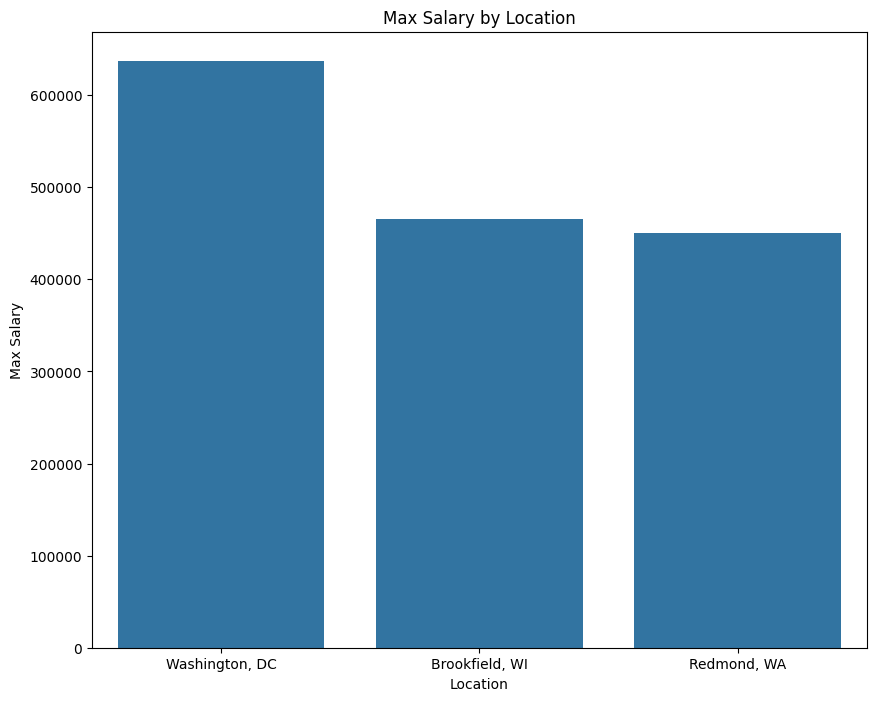

In [ ]:
# Adjusting the figure size for the following plots (10 x 8 inches)
plt.figure(figsize=(10, 8))

# Filtering the DataFrame to keep only rows where the maximum salary is greater than 440000
df_max_loc = df.loc[df['Max_Salary'] > 440000]

# Creating a bar plot to show the maximum salary by location
sns.barplot(x='Location', y='Max_Salary', data=df_max_loc)

# Adding labels to the axes and a title to the plot
plt.xlabel('Location')
plt.ylabel('Max Salary')
plt.title('Max Salary by Location')

# Displaying the plot
plt.show()

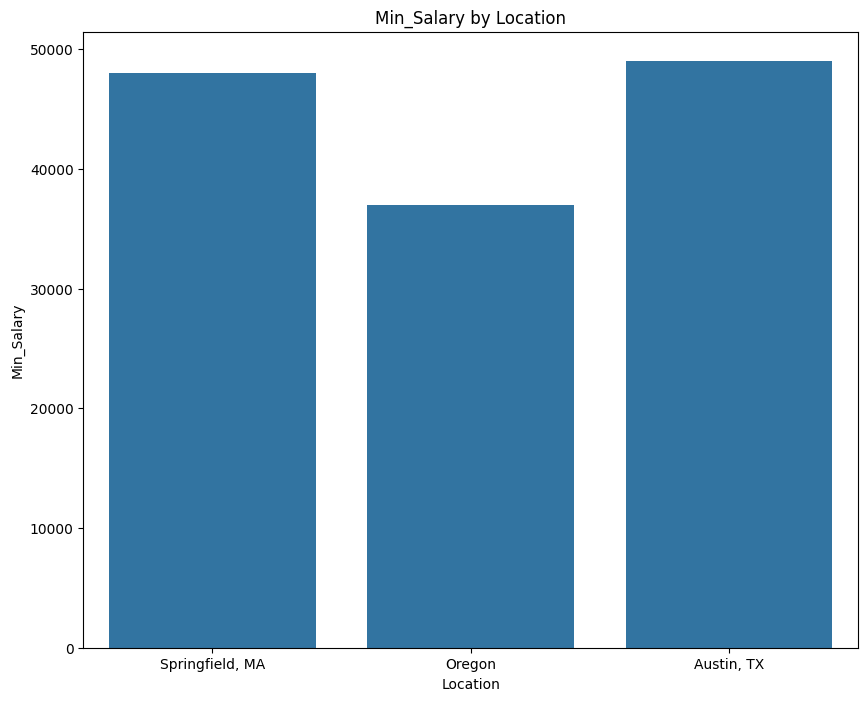

In [ ]:
# Adjusting the figure size for the next plot
plt.figure(figsize=(10, 8))

# Filtering the DataFrame to keep only rows where the minimum salary is less than 50000
df_min_loc = df.loc[df['Min_Salary'] < 50000]

# Creating a bar plot to show the minimum salary by location
sns.barplot(x='Location', y='Min_Salary', data=df_min_loc)

# Adding labels to the axes and a title to the plot
plt.xlabel('Location')
plt.ylabel('Min Salary')
plt.title('Min Salary by Location')

# Displaying the plot
plt.show()

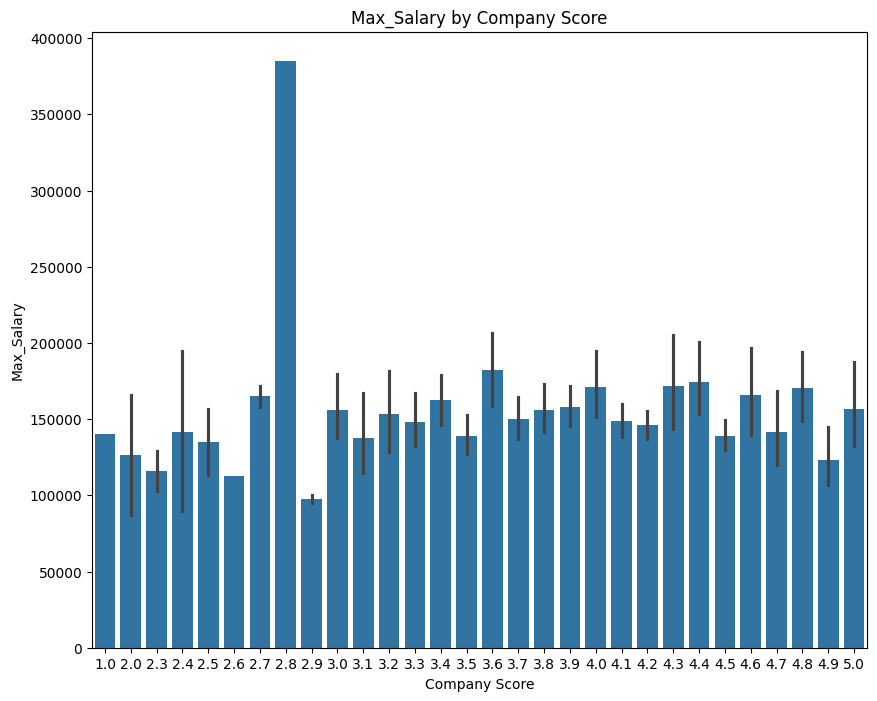

In [ ]:
# Adjusting the figure size for the next plot
plt.figure(figsize=(10, 8))

# Creating a bar plot to show the maximum salary by company score
sns.barplot(x='Company Score', y='Max_Salary', data=df)

# Adding labels to the axes and a title to the plot
plt.xlabel('Company Score')
plt.ylabel('Max Salary')
plt.title('Max Salary by Company Score')

# Displaying the plot
plt.show()

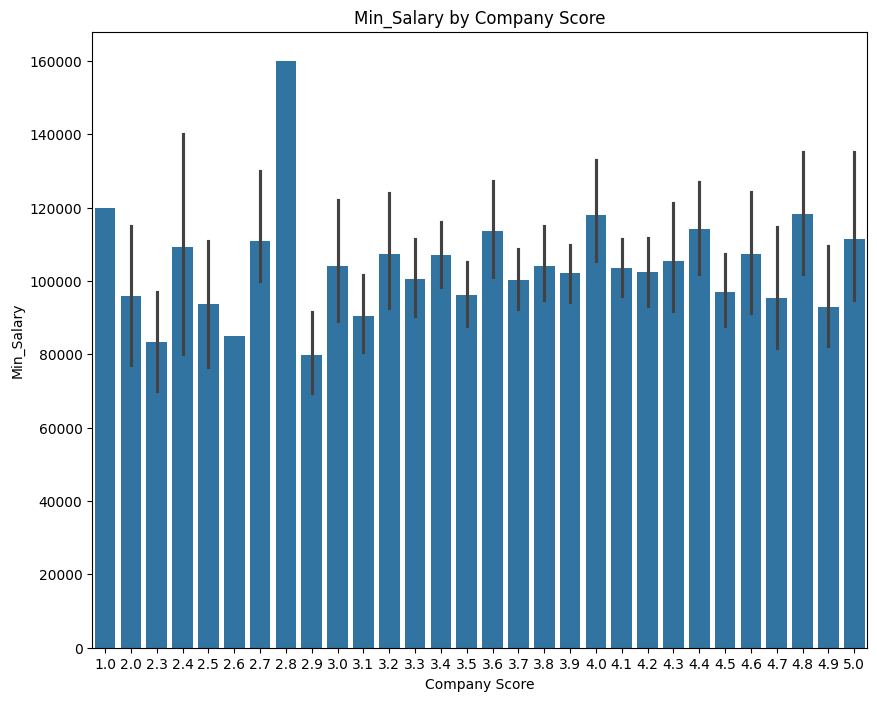

In [ ]:
# Adjusting the figure size for the next plot
plt.figure(figsize=(10, 8))

# Creating a bar plot to show the minimum salary by company score
sns.barplot(x='Company Score', y='Min_Salary', data=df)

# Adding labels to the axes and a title to the plot
plt.xlabel('Company Score')
plt.ylabel('Min Salary')
plt.title('Min Salary by Company Score')

# Displaying the plot
plt.show()

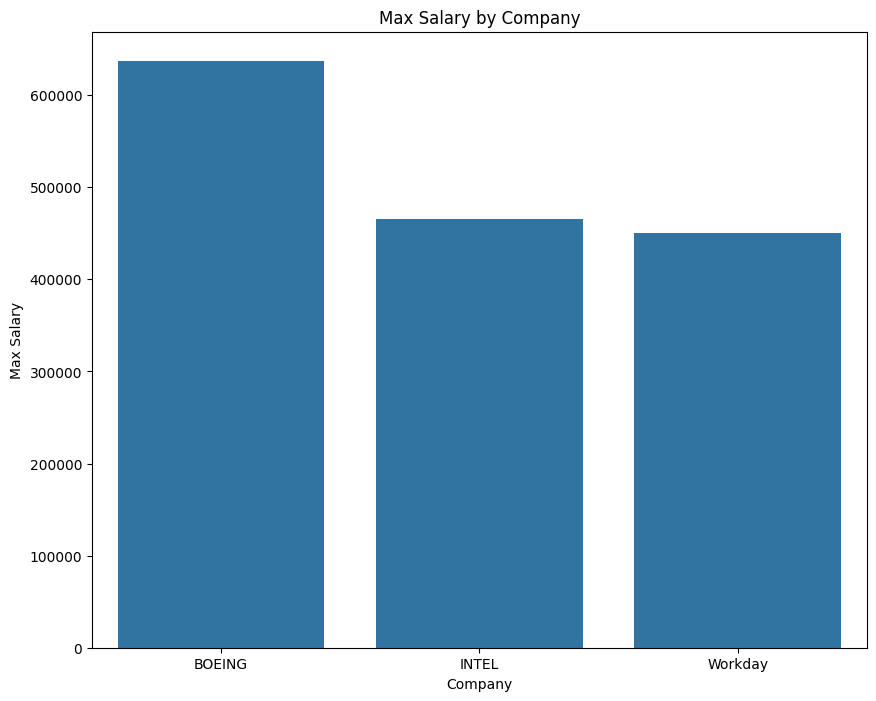

In [ ]:
# Adjusting the figure size for the next plot
plt.figure(figsize=(10, 8))

# Filtering the DataFrame
df_max_loc = df.loc[df['Max_Salary'] > 440000]

# Creating a bar plot to show the maximum salary by company
sns.barplot(x='Company', y='Max_Salary', data=df_max_loc)

# Adding labels to the axes and a title to the plot
plt.xlabel('Company')
plt.ylabel('Max Salary')
plt.title('Max Salary by Company')

# Displaying the plot
plt.show()

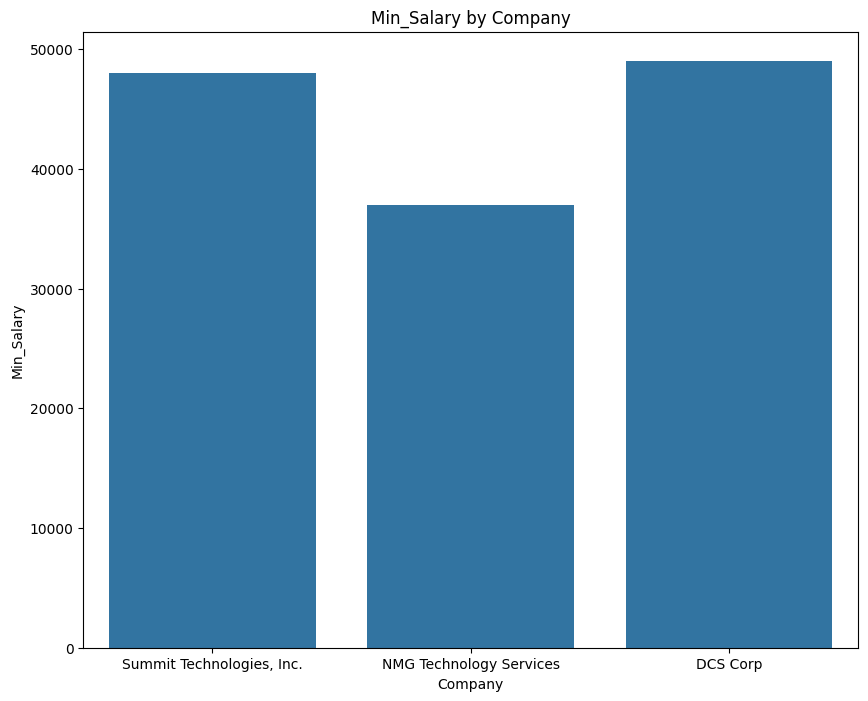

In [ ]:
# Adjusting the figure size for the next plot
plt.figure(figsize=(10, 8))

# Filtering the DataFrame
df_min_loc = df.loc[df['Min_Salary'] < 50000]

# Creating a bar plot to show the minimum salary by company
sns.barplot(x='Company', y='Min_Salary', data=df_min_loc)

# Adding labels to the axes and a title to the plot
plt.xlabel('Company')
plt.ylabel('Min Salary')
plt.title('Min Salary by Company')

# Displaying the plot
plt.show()